In [ ]:
pip install rasterio

In [1]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 46.5 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

In [3]:
dst_crs = 'EPSG:4326'
out='wycinek.tif'
dtm = r"/dabie.asc"


with rio.open(dtm) as src:
    elevation = src.read(1)
    elevation[elevation <= -9999] = np.nan #numpy no data ustawione na mniejsze niż zero

ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="Numeryczny model terenu \"Dabie\"",
    figsize=(20, 10),
)

plt.show()

RasterioIOError: /dabie.asc: No such file or directory

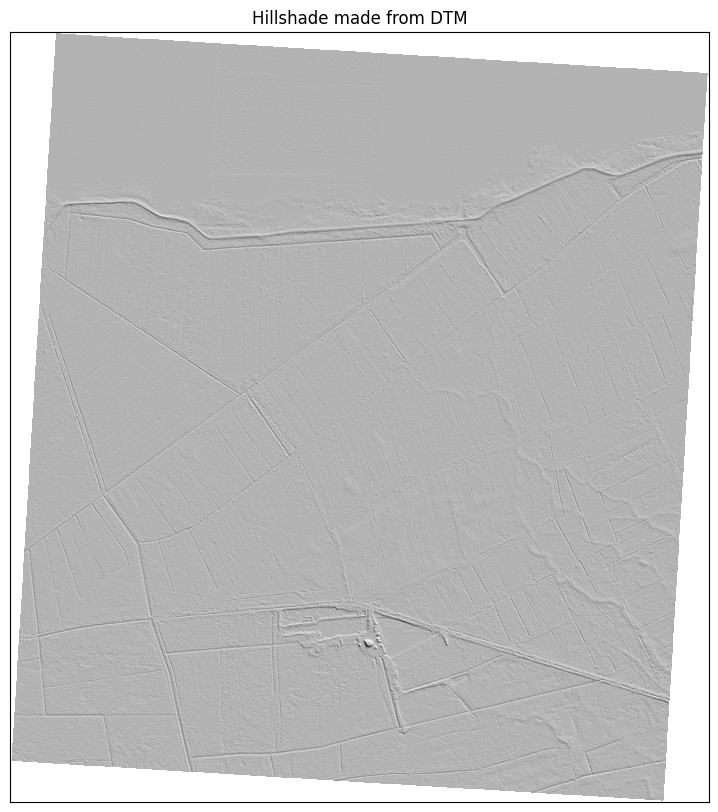

In [ ]:
# Cieniowanie
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(20, 10),
)


plt.show()

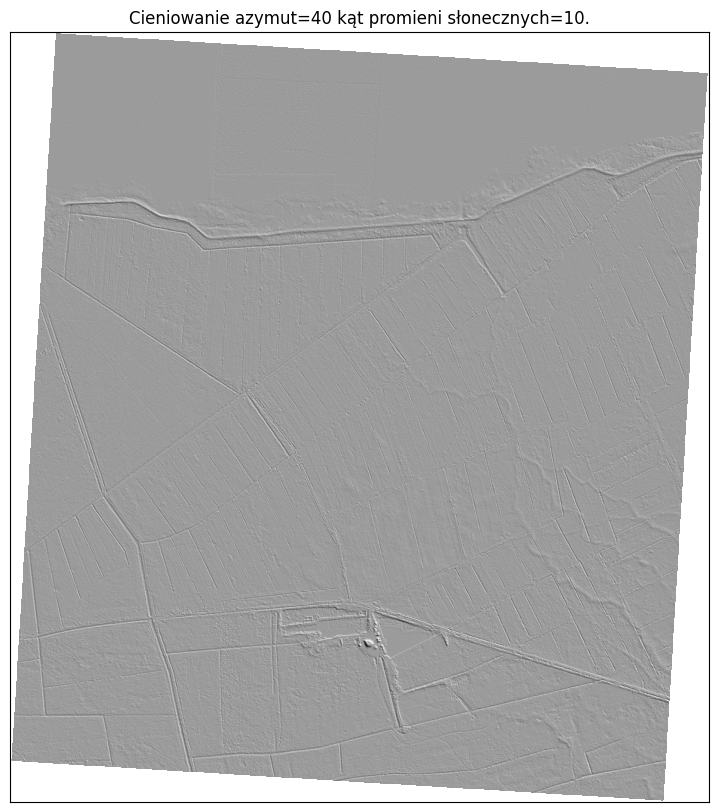

In [ ]:
azimuth=40
altitude=10
hillshade_azimuth = es.hillshade(elevation, azimuth=azimuth,altitude=altitude)

# Plot the hillshade layer with the modified azimuth
ep.plot_bands(
    hillshade_azimuth, #dodana funkcja cieniowania pod kątem
    cbar=False,
    title="Cieniowanie azymut="+str(azimuth)+" kąt promieni słonecznych="+str(altitude)+".",
    figsize=(20, 10),
)
plt.show()

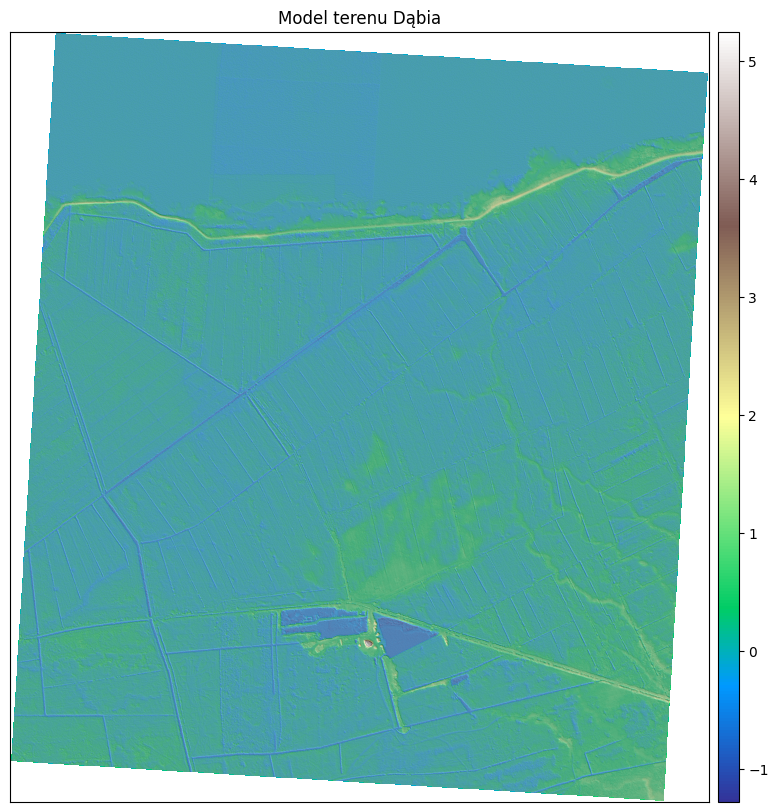

In [ ]:
# dem i hillshade na jednym obrazie

fig, ax = plt.subplots(figsize=(20, 10))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Model terenu Dąbia",
)
ax.imshow(hillshade_azimuth, cmap="Greys", alpha=0.5) #przeźroczystość
plt.show()

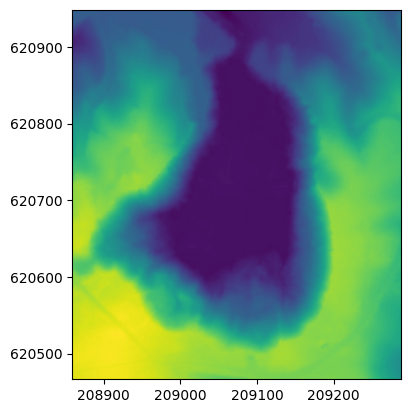

BoundingBox(left=208859.5, bottom=620466.5, right=209287.5, top=620948.5)


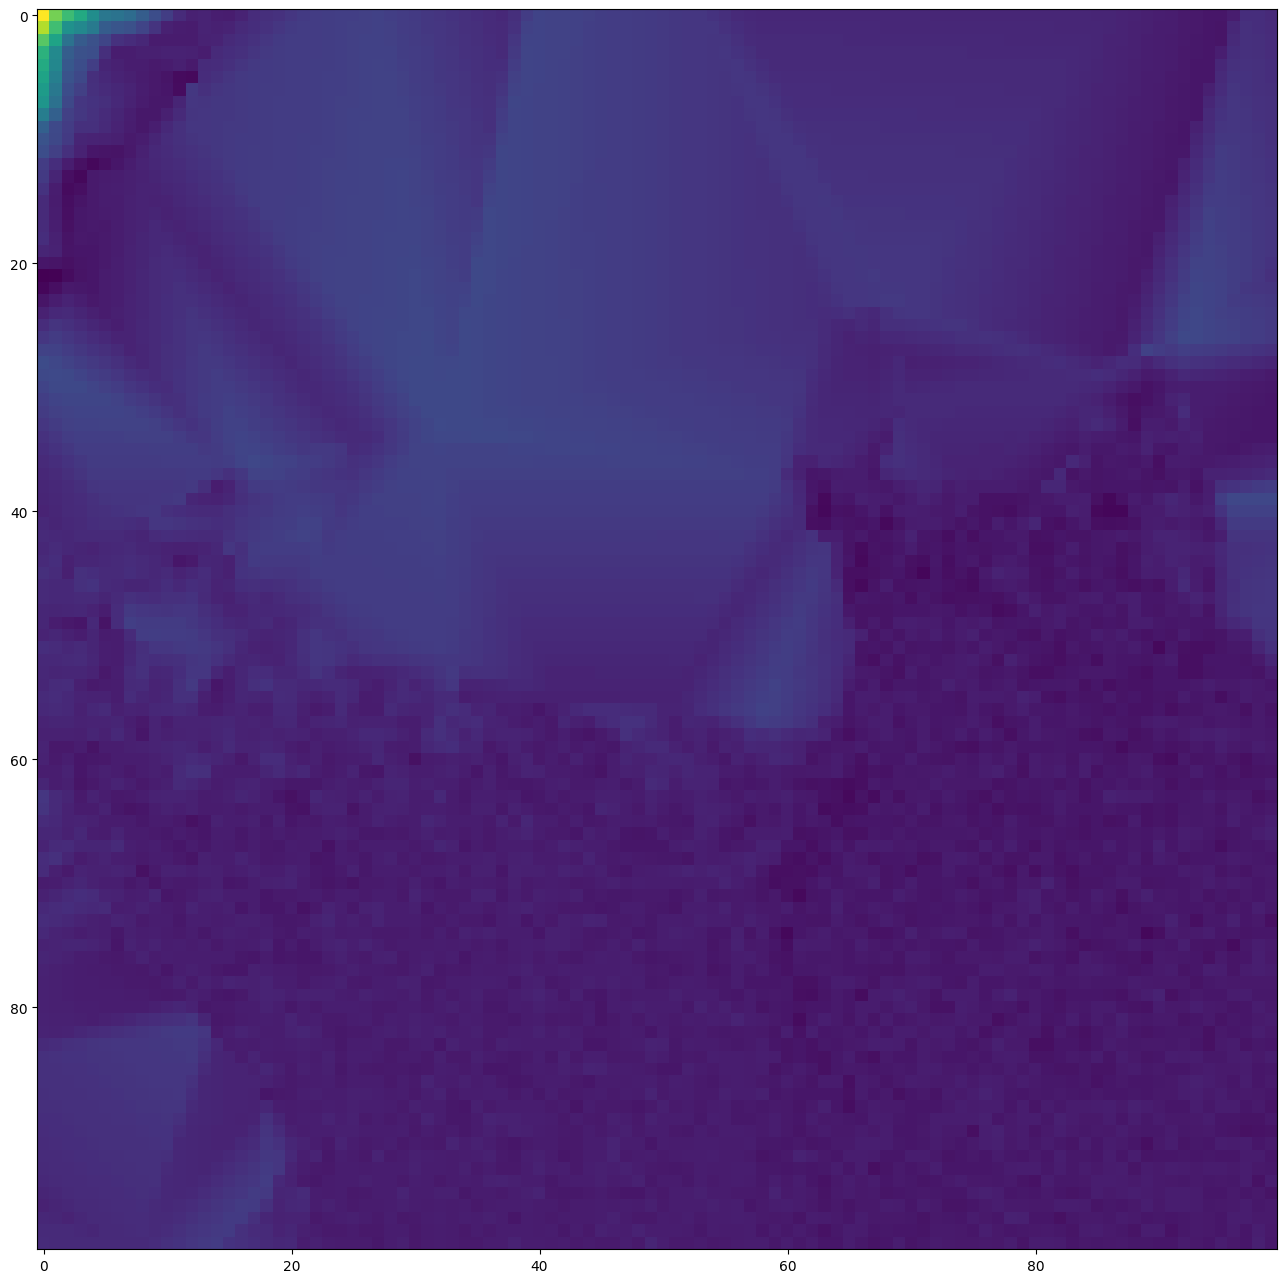

In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.transform import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import from_bounds

import numpy as np
from matplotlib import pyplot as plt
#import earthpy

image = rasterio.open('/puszcza_bukowa_szmaragdowe.asc')
show(image)



print(image.bounds)
middle = image.xy(image.height // 2, image.width // 2)
left = middle[0] - 50
bottom = middle[1] - 50
right = middle[0] + 50
top = middle[1] + 50

with rasterio.open('/puszcza_bukowa_szmaragdowe.asc') as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))




plt.figure(figsize=(16,18.5))
plt.imshow(rst)

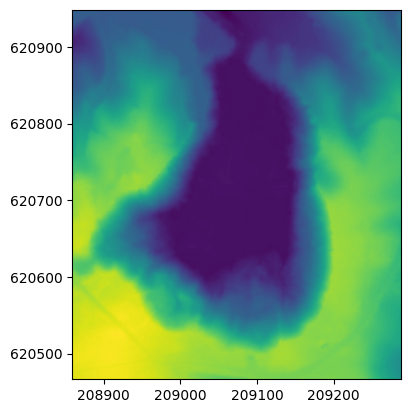

{'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999.0, 'width': 428, 'height': 482, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 208859.5,
       0.0, -1.0, 620948.5), 'blockysize': 1, 'tiled': False}
{'driver': 'AAIGrid', 'dtype': 'float32', 'nodata': -9999.0, 'width': 428, 'height': 482, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0, 0.0, 208859.5,
       0.0, -1.0, 620948.5), 'blockysize': 1, 'tiled': False}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 100, 'height': 100, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0, 0.0, 209024.0,
       0.0, -1.0, 620757.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


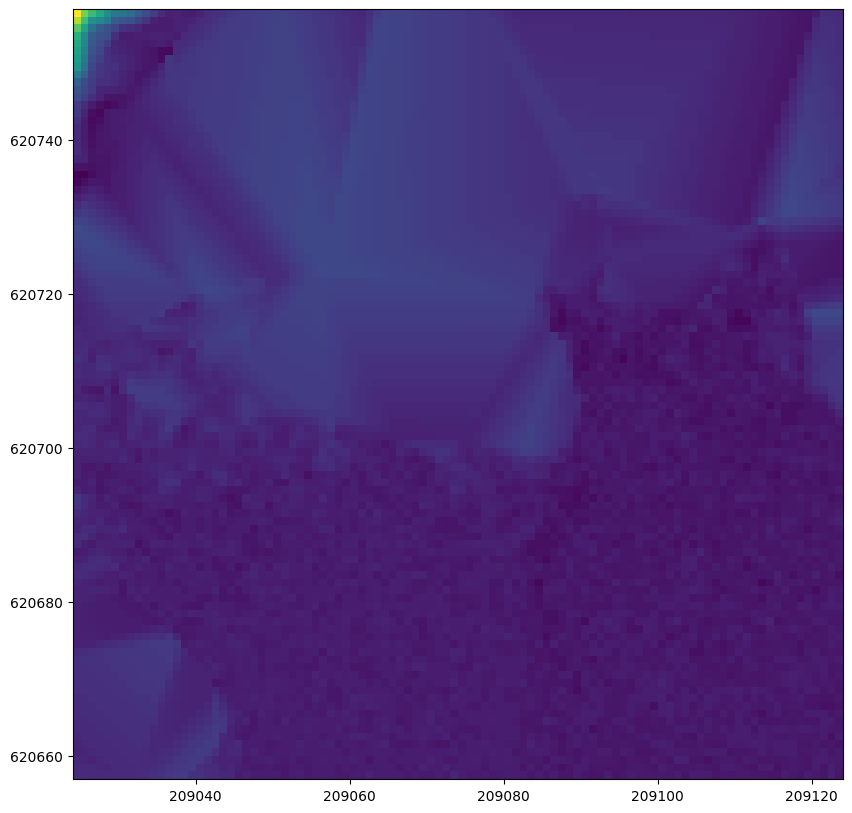

In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.transform import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
import numpy as np
from matplotlib import pyplot as plt

image = rasterio.open('/puszcza_bukowa_szmaragdowe.asc')
show(image)

print(image.profile)

with rasterio.open('/puszcza_bukowa_szmaragdowe.asc') as src:
    data = src.read(1)
    profile = src.profile
    profile.update({
        'crs': 'EPSG:4326'  # Nowy CRS
    })

    # Nowy profil z crsem w nowym pliku
    with rasterio.open('modified.tif', 'w', **profile) as dst:
        dst.write(data, 1)
        print(dst.profile)


with rasterio.open('modified.tif') as src:

    window = from_bounds(left, bottom, right, top, src.transform)

    data = src.read(1, window=window)

    window_bounds = rasterio.windows.bounds(window, src.transform)

    #transformacja wycinka do EPSG
    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, dst_crs, data.shape[1], data.shape[0], *window_bounds, dst_width=data.shape[1], dst_height=data.shape[0]
    )

    profile = src.profile
    profile.update({
        'transform': transform,
        'width': width,
        'height': height,
        'driver': 'GTiff'
    })

    with rasterio.open('output.tif', 'w', **profile) as dst:
        rasterio.warp.reproject(
            source=data,
            destination=rasterio.band(dst, 1),
            src_transform=src.window_transform(window),
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest
        )

with rasterio.open('output.tif') as src:
    plt.figure(figsize=(10, 10))
    print(src.profile)
    show(src)

plt.show()











